**Given the ‘credit_card’ dataset, below is the data definition:**

**1) CUSTID: Identification of Credit Card holder (Categorical)**


**2) BALANCE: Balance amount left in their account to make purchases**


**3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)**


**4) PURCHASES: Amount of purchases made from account**


**5) ONEOFFPURCHASES: Maximum purchase amount done in one-go**


**6) INSTALLMENTSPURCHASES: Amount of purchase done in installment**


**7) CASHADVANCE: Cash in advance given by the user**


**8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)**


**9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)**


**10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)**


**11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" 13) PURCHASESTRX: Number of purchase transactions made**


**14) CREDITLIMIT: Limit of Credit Card for user**


**15) PAYMENTS: Amount of Payment done by user**


**16) MINIMUM_PAYMENTS: Minimum amount of payments made by user 17) PRCFULLPAYMENT: Percent of full payment paid by user**


**18) TENURE: Tenure of credit card service for user**

# Import Packages

In [1]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'datetime' is used to perform date and time operations
import datetime as dt

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA



# Read the Data

In [2]:
# read the data
raw_data = pd.read_csv('../Dataset/credit_card.csv')
# print the first five rows of the data
raw_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Understand and Prepare the Data

In [4]:
# get the shape
print(raw_data.shape)

(8950, 18)


In [3]:
# check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# data frame with numerical features
raw_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [22]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# histogram 

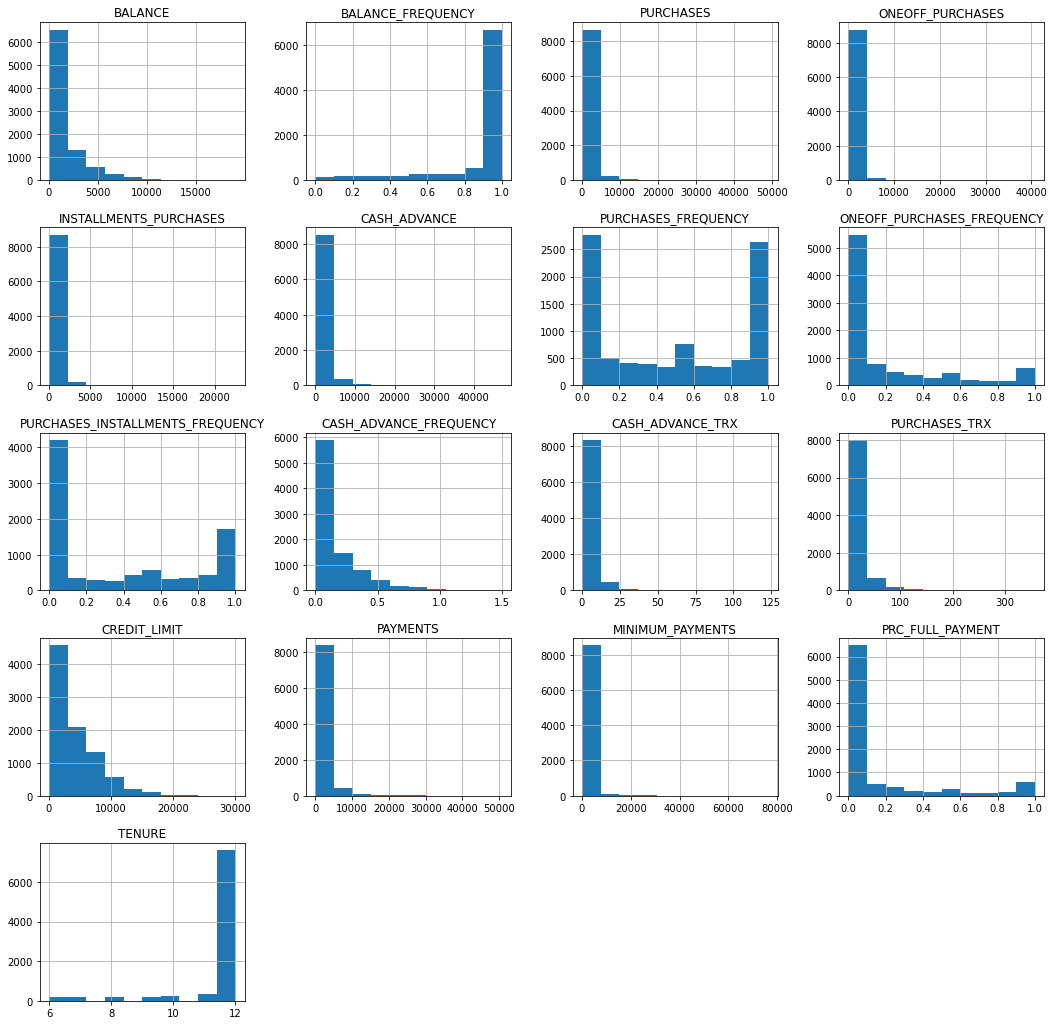

In [25]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
fig = raw_data.hist(figsize = (18,18))

In [ ]:
**Here we can s

# MISSING VALUES

In [6]:
# sorting variables based on null values
# 'ascending = False' sorts values in the descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (raw_data.isnull().sum()/raw_data.isnull().count()*100).sort_values(ascending=False)   

# create a dataframe using 'concat' function 
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
CUST_ID,0,0.000000
BALANCE,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


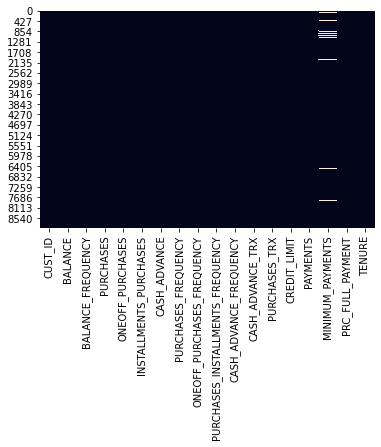

In [8]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 

import seaborn as sns
sns.heatmap(raw_data.isnull(), cbar=False)

# display the plot
plt.show()

In [27]:
raw_data.drop(['CUST_ID'], axis=1, inplace=True)

In [29]:
raw_data.shape

(8950, 17)

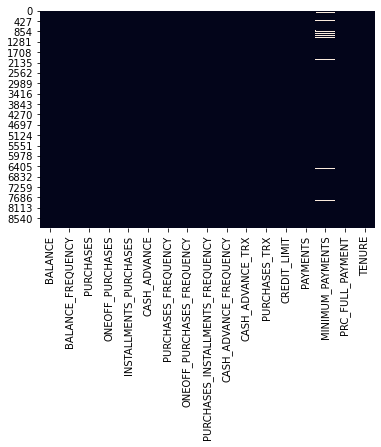

In [31]:
sns.heatmap(raw_data.isnull(), cbar=False)
plt.show()

In [32]:
raw_data.dropna(axis=0, inplace=True)

In [33]:
raw_data.shape

(8636, 17)

**After replacing the null values for both the variables, recheck the null values.**

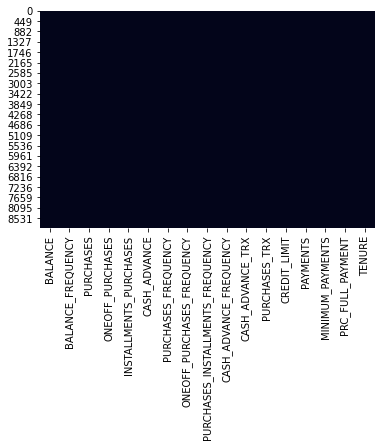

In [35]:
sns.heatmap(raw_data.isnull(), cbar=False)
plt.show()

In [47]:
# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
raw_data = raw_data.apply(lambda rec: (rec - rec.mean()) / rec.std())

raw_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.35516
1,0.764108,0.067675,-0.473181,-0.359139,-0.458812,2.568408,-1.236067,-0.686240,-0.926468,0.556990,0.099252,-0.597020,0.677165,0.796806,0.087684,0.212368,0.35516
2,0.426578,0.505375,-0.116406,0.099904,-0.458812,-0.468628,1.256004,2.646498,-0.926468,-0.681913,-0.479409,-0.120460,0.813805,-0.399480,-0.099900,-0.537696,0.35516
4,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.926468,-0.681913,-0.479409,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.35516
5,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,0.538851,-0.681913,-0.479409,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.35516


In [38]:
# recheck the null values
# 'isnull().sum()' returns the number of missing values in each variable
raw_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [39]:
raw_data.shape

(8636, 17)

In [92]:
raw_data_zstdstd=raw_data
raw_data_zstd

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.355160
4,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.926468,-0.681913,-0.479409,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.355160
5,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,0.538851,-0.681913,-0.479409,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.355160
7,0.106142,0.505375,-0.271899,-0.359139,0.016742,-0.468628,1.256004,-0.686240,1.585508,-0.681913,-0.479409,-0.120460,-0.607255,-0.379892,-0.140047,-0.537696,0.355160
8,-0.279780,0.505375,-0.075651,0.033598,-0.240768,-0.468628,-0.405378,-0.408513,-0.298474,-0.681913,-0.479409,-0.398453,0.677165,-0.376725,-0.232803,-0.537696,0.355160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,-0.672775,0.505375,-0.237844,-0.359139,0.391560,-0.468628,0.148418,-0.686240,0.189965,-0.681913,-0.479409,-0.319026,-0.962520,-0.455460,-0.310243,-0.537696,-1.933198
8837,-0.634004,-0.029592,0.377261,-0.080093,1.038061,-0.468628,0.425314,-0.315936,0.189965,-0.681913,-0.479409,-0.358740,-0.962520,-0.105547,-0.304870,0.812420,-1.933198
8839,0.797014,-0.029592,0.068223,-0.359139,0.820322,1.474805,0.979107,-0.686240,1.027292,0.969956,0.099252,0.038394,0.130603,-0.332427,0.057078,-0.537696,-1.933198
8847,-0.656877,-0.029592,0.039978,-0.359139,0.753590,-0.468628,0.979107,-0.686240,1.027292,-0.681913,-0.479409,1.150366,-0.825879,-0.303838,-0.300466,-0.537696,-1.933198


In [94]:
for col in raw_data_zstd.columns.values:
    raw_data_zstd = df_zstd[(df_zstd[col]>-2) & (df_zstd[col]<2)]
raw_data_zstd    


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.355160
4,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.926468,-0.681913,-0.479409,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.355160
5,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,0.538851,-0.681913,-0.479409,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.355160
7,0.106142,0.505375,-0.271899,-0.359139,0.016742,-0.468628,1.256004,-0.686240,1.585508,-0.681913,-0.479409,-0.120460,-0.607255,-0.379892,-0.140047,-0.537696,0.355160
8,-0.279780,0.505375,-0.075651,0.033598,-0.240768,-0.468628,-0.405378,-0.408513,-0.298474,-0.681913,-0.479409,-0.398453,0.677165,-0.376725,-0.232803,-0.537696,0.355160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,-0.672775,0.505375,-0.237844,-0.359139,0.391560,-0.468628,0.148418,-0.686240,0.189965,-0.681913,-0.479409,-0.319026,-0.962520,-0.455460,-0.310243,-0.537696,-1.933198
8837,-0.634004,-0.029592,0.377261,-0.080093,1.038061,-0.468628,0.425314,-0.315936,0.189965,-0.681913,-0.479409,-0.358740,-0.962520,-0.105547,-0.304870,0.812420,-1.933198
8839,0.797014,-0.029592,0.068223,-0.359139,0.820322,1.474805,0.979107,-0.686240,1.027292,0.969956,0.099252,0.038394,0.130603,-0.332427,0.057078,-0.537696,-1.933198
8847,-0.656877,-0.029592,0.039978,-0.359139,0.753590,-0.468628,0.979107,-0.686240,1.027292,-0.681913,-0.479409,1.150366,-0.825879,-0.303838,-0.300466,-0.537696,-1.933198


In [79]:
raw_data_zstd.shape

(4909, 17)

**Plot the boxplot for numeric data using Z-Score**

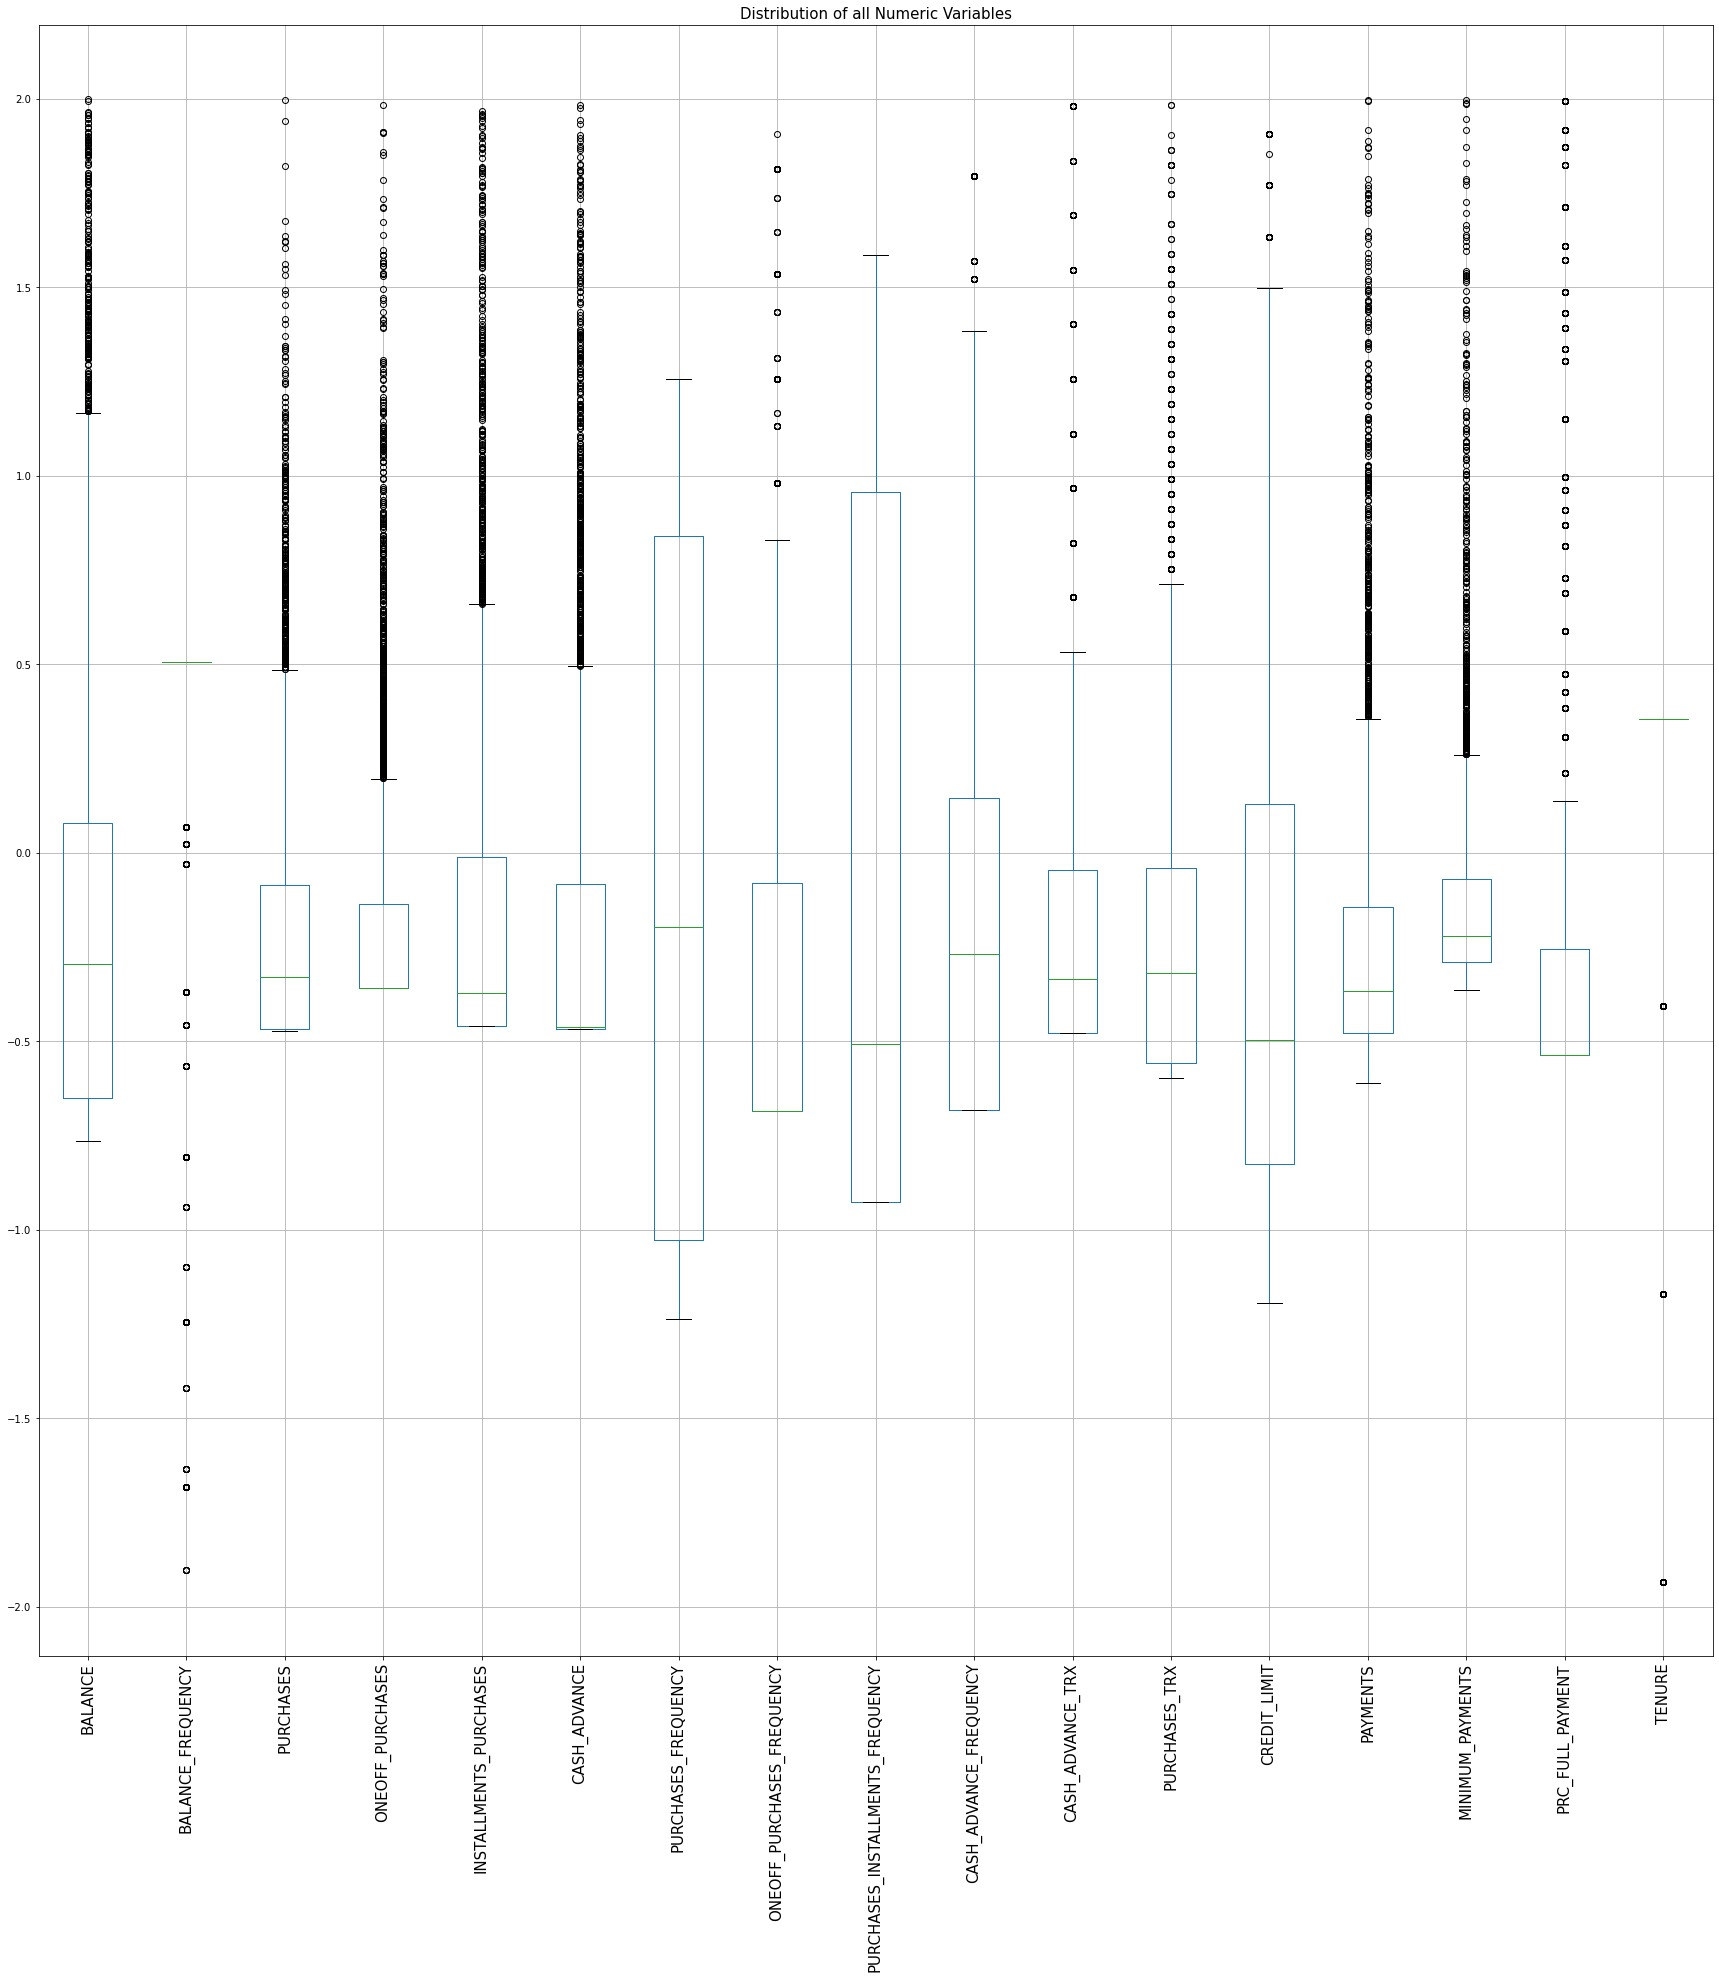

In [83]:
plt.subplots(figsize=(30,30))
# plot a boxplot to visualize the outliers in all the numeric variables
raw_data_zstd.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

Text(0.5, 0, 'Sample')

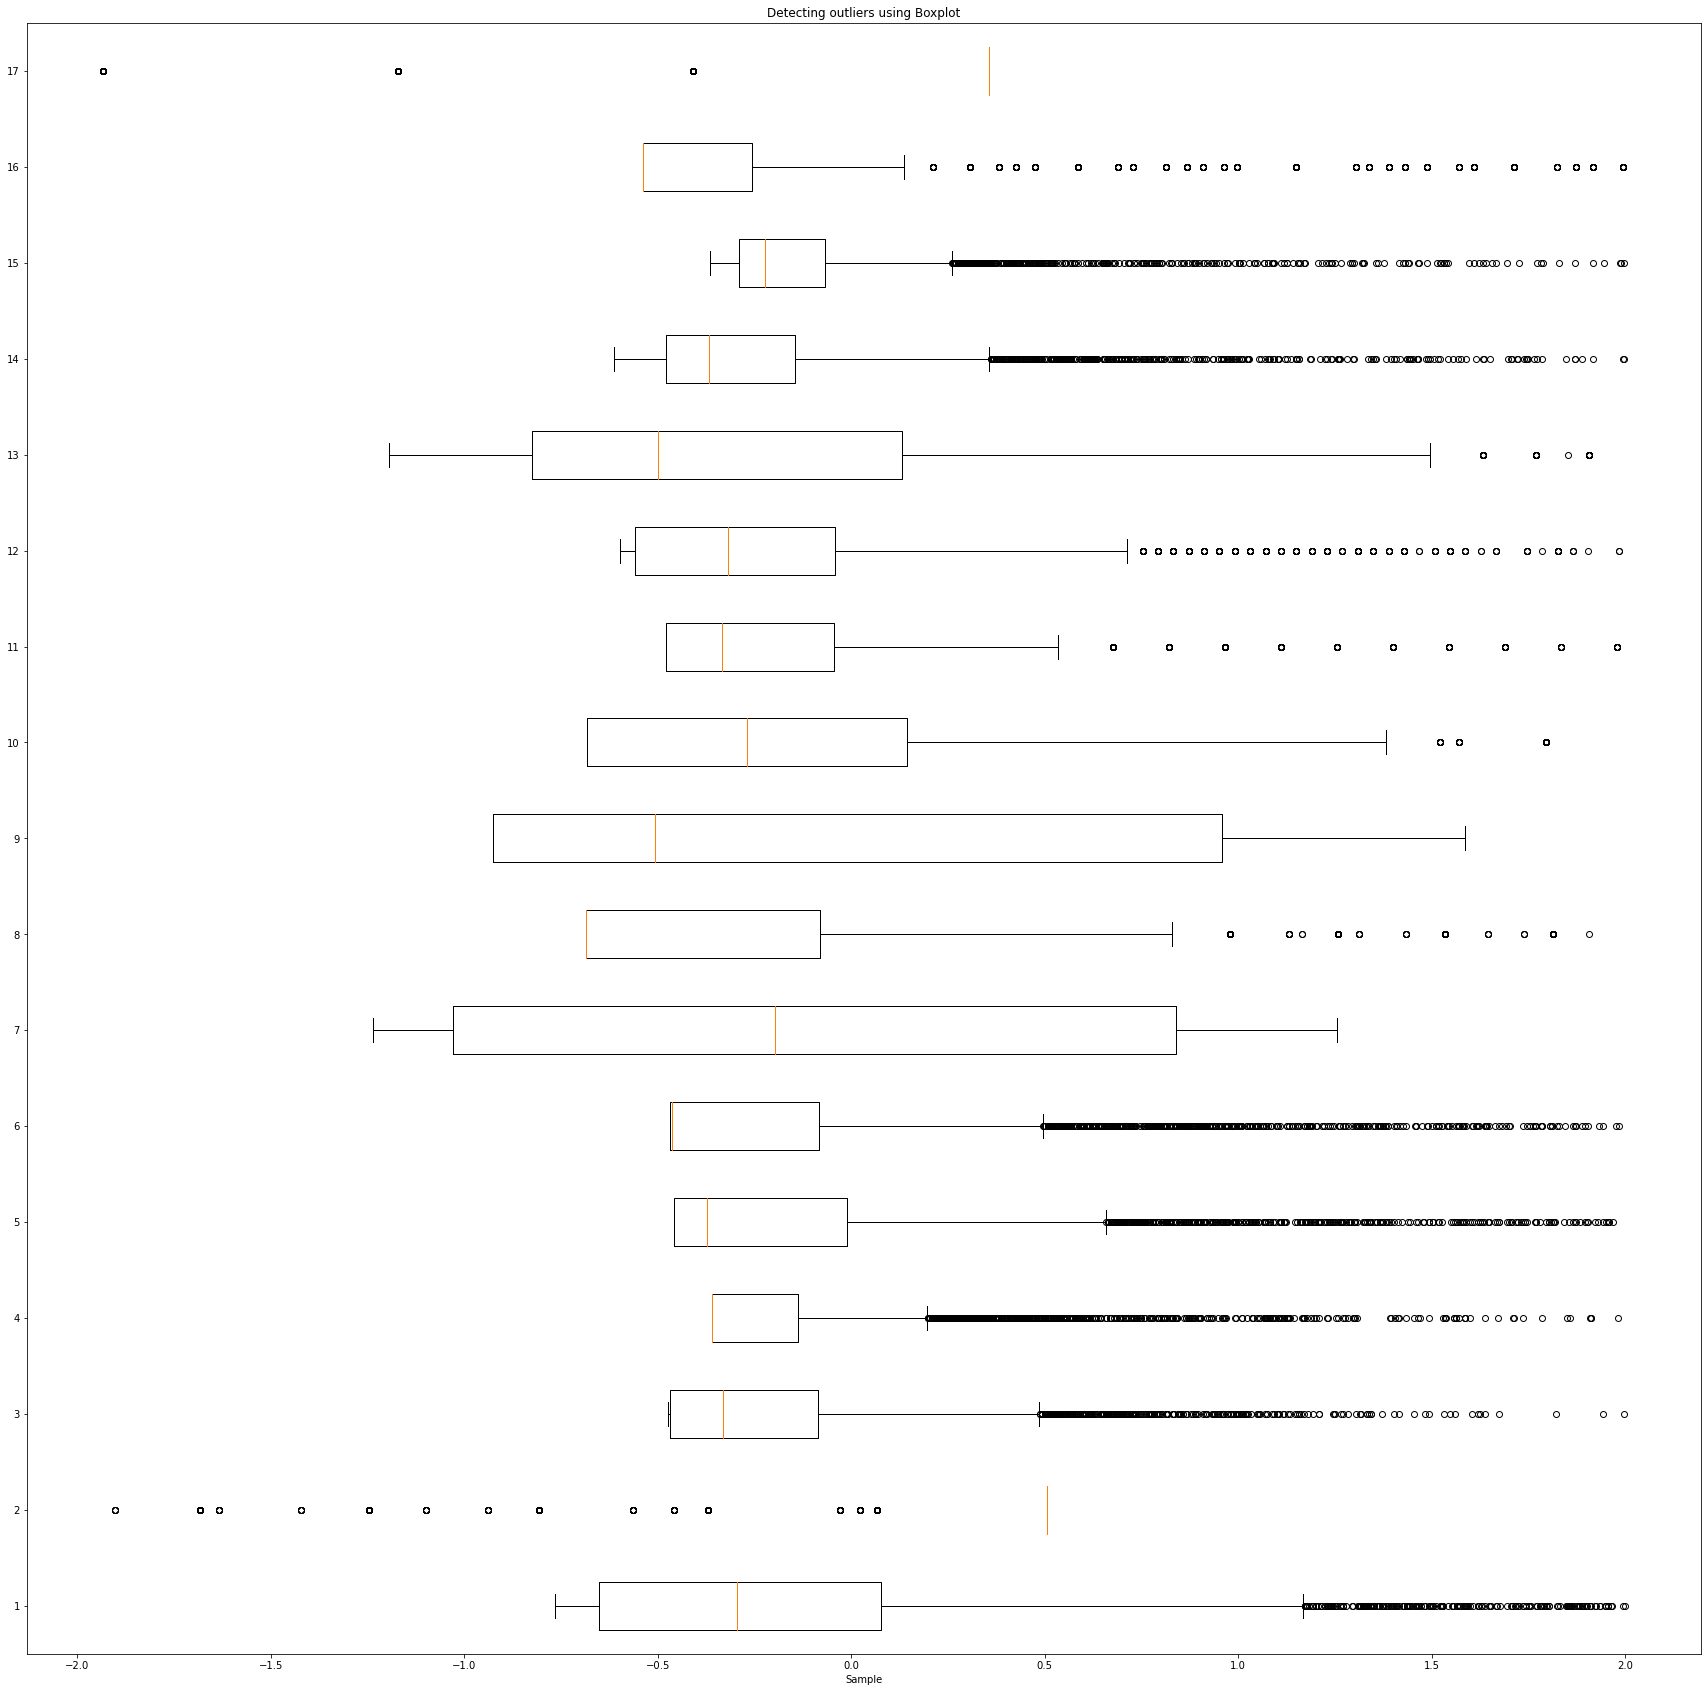

In [84]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(30,30))
plt.boxplot( raw_data_zstd,vert=False)

plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [138]:
#Correlation matrix

corr=raw_data_zstd.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.327394,0.020685,0.082995,-0.073849,0.430823,-0.195955,0.050621,-0.190813,0.398976,0.374778,-0.049919,0.372114,0.231190,0.582780,-0.389505,0.028562
BALANCE_FREQUENCY,0.327394,1.000000,0.047459,0.033769,0.040354,0.022706,0.074733,0.068521,0.075324,0.134607,0.105478,0.102987,0.014041,-0.028275,0.223319,-0.269779,0.122155
PURCHASES,0.020685,0.047459,1.000000,0.836090,0.681143,-0.153327,0.555438,0.604826,0.429157,-0.224543,-0.183333,0.700246,0.250610,0.356366,0.055637,0.140055,0.031159
ONEOFF_PURCHASES,0.082995,0.033769,0.836090,1.000000,0.167959,-0.091140,0.252516,0.718380,0.054208,-0.123131,-0.099159,0.438688,0.228391,0.306923,0.018823,0.012628,0.002946
INSTALLMENTS_PURCHASES,-0.073849,0.040354,0.681143,0.167959,1.000000,-0.154175,0.661262,0.128229,0.698923,-0.239192,-0.197220,0.672924,0.145474,0.230542,0.074824,0.234699,0.051429
CASH_ADVANCE,0.430823,0.022706,-0.153327,-0.091140,-0.154175,1.000000,-0.297423,-0.116650,-0.259008,0.642758,0.673960,-0.196035,0.179952,0.350557,0.185045,-0.142827,-0.080475
PURCHASES_FREQUENCY,-0.195955,0.074733,0.555438,0.252516,0.661262,-0.297423,1.000000,0.339536,0.929089,-0.383101,-0.315179,0.778110,0.059186,0.058971,-0.020194,0.294209,0.035141
ONEOFF_PURCHASES_FREQUENCY,0.050621,0.068521,0.604826,0.718380,0.128229,-0.116650,0.339536,1.000000,0.051446,-0.118893,-0.092262,0.507426,0.185603,0.189127,0.000838,0.002207,0.009868
PURCHASES_INSTALLMENTS_FREQUENCY,-0.190813,0.075324,0.429157,0.054208,0.698923,-0.259008,0.929089,0.051446,1.000000,-0.336543,-0.280217,0.711204,0.026562,0.032298,-0.008988,0.283051,0.054898
CASH_ADVANCE_FREQUENCY,0.398976,0.134607,-0.224543,-0.123131,-0.239192,0.642758,-0.383101,-0.118893,-0.336543,1.000000,0.881667,-0.244972,0.016557,0.168868,0.175087,-0.224249,-0.067425


<AxesSubplot:>

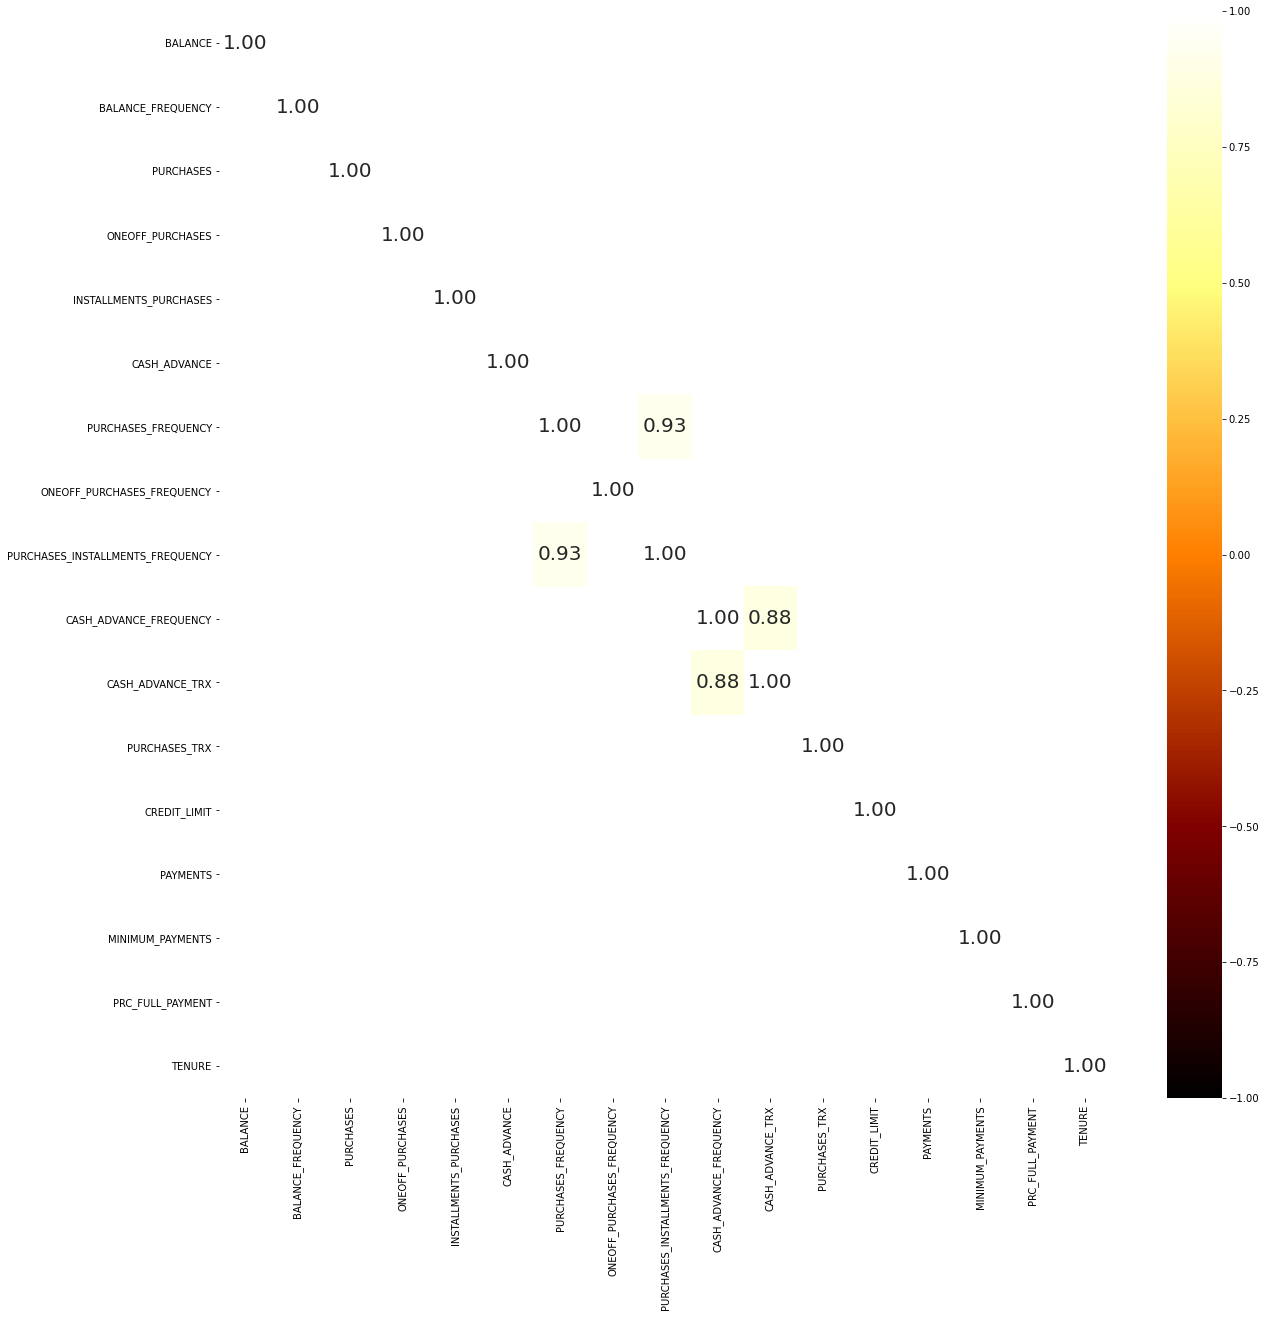

In [87]:
#using corr martix ploting heatmap
plt.subplots(figsize=(20,20))



sns.heatmap(corr[(corr>.85)|(corr<-.85)],annot=True,vmin=-1,annot_kws={'size':20},cmap=plt.cm.afmhot,fmt='.2f')

In [82]:
raw_data_zstd.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [96]:
df=raw_data_zstd.drop(['CASH_ADVANCE_TRX','PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1,)
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [97]:
df.reset_index()

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.681913,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.355160
1,4,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.681913,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.355160
2,5,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,-0.681913,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.355160
3,7,0.106142,0.505375,-0.271899,-0.359139,0.016742,-0.468628,1.256004,-0.686240,-0.681913,-0.120460,-0.607255,-0.379892,-0.140047,-0.537696,0.355160
4,8,-0.279780,0.505375,-0.075651,0.033598,-0.240768,-0.468628,-0.405378,-0.408513,-0.681913,-0.398453,0.677165,-0.376725,-0.232803,-0.537696,0.355160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,8834,-0.672775,0.505375,-0.237844,-0.359139,0.391560,-0.468628,0.148418,-0.686240,-0.681913,-0.319026,-0.962520,-0.455460,-0.310243,-0.537696,-1.933198
4905,8837,-0.634004,-0.029592,0.377261,-0.080093,1.038061,-0.468628,0.425314,-0.315936,-0.681913,-0.358740,-0.962520,-0.105547,-0.304870,0.812420,-1.933198
4906,8839,0.797014,-0.029592,0.068223,-0.359139,0.820322,1.474805,0.979107,-0.686240,0.969956,0.038394,0.130603,-0.332427,0.057078,-0.537696,-1.933198
4907,8847,-0.656877,-0.029592,0.039978,-0.359139,0.753590,-0.468628,0.979107,-0.686240,-0.681913,1.150366,-0.825879,-0.303838,-0.300466,-0.537696,-1.933198


## PCA

In [103]:
# specify required no of components
# take 'n_components=5' based on the analysis of scree plot
pca = PCA(n_components=11, random_state=10)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df)

In [104]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.656208,-1.340040,0.090401,-0.364574,-0.064348,0.402306,-0.243201,-0.185478,0.049054,-0.022983,-0.116355
1,-0.827352,-0.809953,-0.259455,-0.696154,-0.338500,-0.146864,-0.209847,0.125045,0.090999,0.123164,-0.083906
2,0.690801,-0.075997,-0.744241,0.318374,-0.669657,0.534947,-0.733085,0.528660,0.264313,-0.274770,0.015087
3,1.024545,-0.236663,-0.827587,0.349229,-0.692966,0.373928,0.099696,-0.053653,-0.357970,0.203483,0.161253
4,-0.057344,0.169820,0.603165,-0.386421,-0.906369,-0.139481,0.154620,-0.258588,0.374073,-0.010249,0.038233


In [105]:
## Explained Variance Ratio
print("Total Variance Explained: ", sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_



Total Variance Explained:  0.968629119469758


array([0.33417147, 0.17703538, 0.10017577, 0.08811348, 0.07850836,
       0.04769792, 0.0382857 , 0.03448104, 0.03126704, 0.02333416,
       0.01555881])

Perform dimensionality reduction using PCA such that the  96% of the variance is explained

HER WE USED THE BUILT IN PCA FUNCTION TO PERFORM DIMENSION REDUCTION AND OBTAINED THE NEW DATASET WITH 11 DIMNENSION AS WE WANTED 95% IS GOT 96% Variance..

## K-MEANS

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [4, 5, 6, 7, 8,9,10]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df)
    
    score = silhouette_score(df, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 4, silhouette score is 0.18691197403562673)
For n_clusters = 5, silhouette score is 0.20254354838091987)
For n_clusters = 6, silhouette score is 0.17608006404651838)
For n_clusters = 7, silhouette score is 0.1728351717471224)
For n_clusters = 8, silhouette score is 0.1834919746833941)
For n_clusters = 9, silhouette score is 0.18077117546258195)
For n_clusters = 10, silhouette score is 0.18863993712601929)


In [111]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 5, random_state= 10)

# fit the model
model.fit(df)

KMeans(n_clusters=5, random_state=10)

In [114]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.681913,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.35516,3
4,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.681913,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.35516,3
5,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,-0.681913,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.35516,2
7,0.106142,0.505375,-0.271899,-0.359139,0.016742,-0.468628,1.256004,-0.686240,-0.681913,-0.120460,-0.607255,-0.379892,-0.140047,-0.537696,0.35516,2
8,-0.279780,0.505375,-0.075651,0.033598,-0.240768,-0.468628,-0.405378,-0.408513,-0.681913,-0.398453,0.677165,-0.376725,-0.232803,-0.537696,0.35516,3


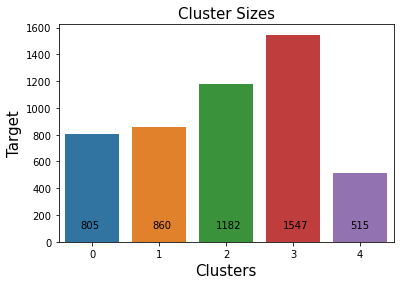

In [126]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Target', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =100, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =100, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =100, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =100, s = np.unique(model.labels_, return_counts=True)[1][3])
plt.text(x = 3.85, y =100, s = np.unique(model.labels_, return_counts=True)[1][4])


plt.show()

**We select cluster 3=1574 having maximum values**